# **Fourier Transform**

## Apply fast Fourier Transformation on structure data

+ A structure shakes at its natural frequency when wind or earthquake invokes its vibration. Applying fast Fourier transform on the vibration signal allows us to figure out the natural frequency. As a result, the time-series data can be reduced to the peak-frequency features of the structure. Discuss the effectiveness of this technique in terms of dimensionality reduction.

In [2]:
import pandas as pd

In [9]:
path = './Rawdata/5StorySteelStructure.csv'
df = pd.read_csv(path, header = None)
print(df)

            0         1         2         3         4         5
0        0.01  2.277022 -0.889779 -0.338232  0.229364 -0.259620
1        0.02 -0.735373  1.391976 -0.315034 -0.394600  0.006826
2        0.03 -0.610967 -0.657298  1.233443 -0.057718 -0.391346
3        0.04  0.653824 -0.648688 -1.100871  0.964646  0.018801
4        0.05 -0.510258  0.594079 -0.291836 -1.422822  1.461801
...       ...       ...       ...       ...       ...       ...
17995  179.96  0.727875 -0.212428  0.134431 -0.371164  0.171484
17996  179.97 -0.178509  0.269754 -0.778997  0.132694  0.524749
17997  179.98 -0.474713 -0.729051  0.641890  0.276235 -0.020118
17998  179.99 -0.060027  0.203741 -0.083052  0.161988 -0.029099
17999  180.00  0.787116  0.528066 -0.280237 -0.415105  0.228366

[18000 rows x 6 columns]


In [20]:
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt

In [11]:
df.columns = ['t','1F','2F','3F','4F','5F']
print(df)

            t        1F        2F        3F        4F        5F
0        0.01  2.277022 -0.889779 -0.338232  0.229364 -0.259620
1        0.02 -0.735373  1.391976 -0.315034 -0.394600  0.006826
2        0.03 -0.610967 -0.657298  1.233443 -0.057718 -0.391346
3        0.04  0.653824 -0.648688 -1.100871  0.964646  0.018801
4        0.05 -0.510258  0.594079 -0.291836 -1.422822  1.461801
...       ...       ...       ...       ...       ...       ...
17995  179.96  0.727875 -0.212428  0.134431 -0.371164  0.171484
17996  179.97 -0.178509  0.269754 -0.778997  0.132694  0.524749
17997  179.98 -0.474713 -0.729051  0.641890  0.276235 -0.020118
17998  179.99 -0.060027  0.203741 -0.083052  0.161988 -0.029099
17999  180.00  0.787116  0.528066 -0.280237 -0.415105  0.228366

[18000 rows x 6 columns]


In [26]:
cols = ['1F','2F','3F','4F','5F']
for i in cols:
    arr_s = df[i].to_numpy()
    X = fftpack.fft(arr_s)
    print(X)

[-14.75244222-0.j          -2.88579023+2.48145846j
   2.64323817-0.45598598j ...   3.62148957-1.94539445j
   2.64323817+0.45598598j  -2.88579023-2.48145846j]
[-8.03421563-0.j         -3.57566044+4.48434246j -1.13194484+2.25615483j
 ...  0.98079312-0.46227136j -1.13194484-2.25615483j
 -3.57566044-4.48434246j]
[-10.18471682-0.j          -1.23754468+3.88518074j
  -1.5054657 +0.86429298j ...   0.67407183+0.29374296j
  -1.5054657 -0.86429298j  -1.23754468-3.88518074j]
[-8.17451374-0.j         -0.53405816+1.92047288j  0.34782021+0.25235858j
 ... -0.44466773+4.01712136j  0.34782021-0.25235858j
 -0.53405816-1.92047288j]
[  4.17856061 -0.j          17.98619077 -3.69431879j
 -14.92571982-25.43050549j ...  18.17201402-11.16914803j
 -14.92571982+25.43050549j  17.98619077 +3.69431879j]


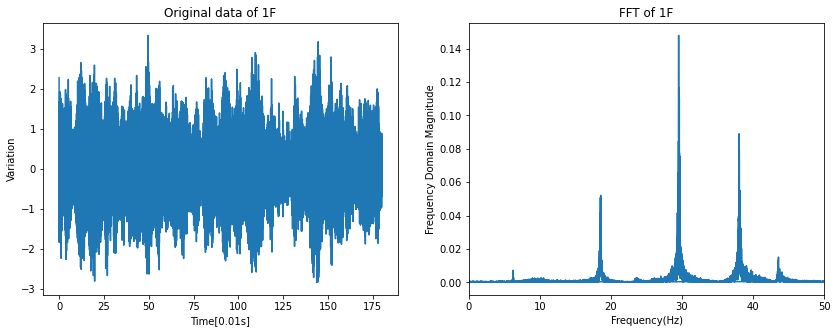

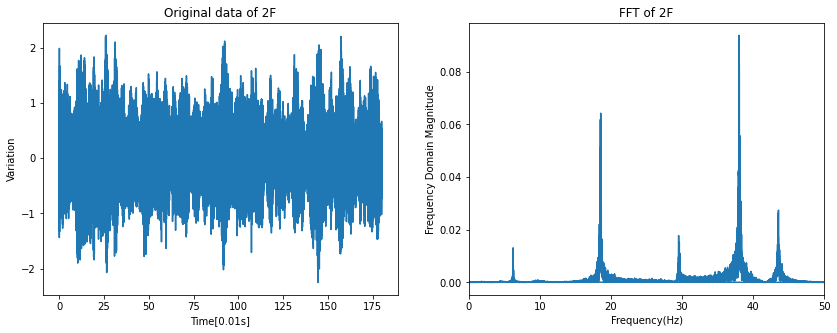

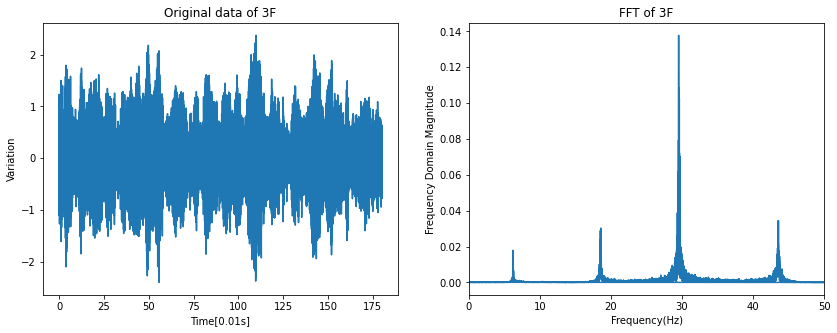

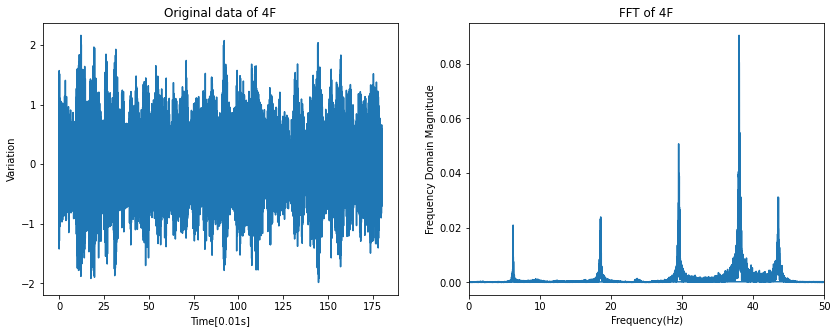

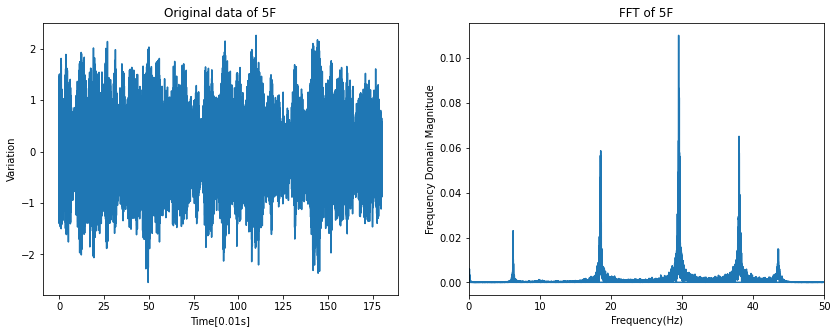

In [29]:
cols = ['1F','2F','3F','4F','5F']
f_s = 100
t = np.linspace(0, 180, 180*f_s)
for i in cols:
    arr_s = df[i].to_numpy()
    X = fftpack.fft(arr_s)                  # Fast Fourier Transformation
    freqs = fftpack.fftfreq(len(df[i]))*f_s # Calculate Frequency
    f = plt.figure(figsize = (14, 5))
    ax1 = f.add_subplot(1, 2, 1)
    ax1.plot(t, df[i])
    ax1.title.set_text('Original data of {}'.format(i))
    ax1.set_xlabel('Time[0.01s]')
    ax1.set_ylabel('Variation')
    ax2 = f.add_subplot(1, 2, 2)
    ax2.plot(freqs, np.abs(X/len(df[i])))
    ax2.set_xlim([0, 50])
    ax2.set_xlabel('Frequency(Hz)')
    ax2.set_ylabel('Frequency Domain Magnitude')
    ax2.title.set_text('FFT of {}'.format(i))
    plt.show()
    f.savefig('./Rawdata/figure/FFT_{}.png'.format(i))